<a href="https://colab.research.google.com/github/Kogstero/cardiovascular-diseases/blob/main/Dataset_coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub


# Download latest version
path = kagglehub.dataset_download("navjotkaushal/coffee-sales-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'coffee-sales-dataset' dataset.
Path to dataset files: /kaggle/input/coffee-sales-dataset


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/kaggle/input/coffee-sales-dataset/Coffe_sales.csv')
df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df['Date']=pd.to_datetime(df['Date'])

df.head(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


In [ ]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour
df.sample(5)

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time,Hour
2608,14,card,25.96,Cortado,Afternoon,Thu,Jan,4,1,2025-01-02,2025-09-08 14:42:45.847,14
1663,10,card,30.86,Americano with Milk,Morning,Tue,Oct,2,10,2024-10-01,2025-09-08 10:03:47.115,10
1008,11,card,27.92,Americano with Milk,Morning,Tue,Jul,2,7,2024-07-30,2025-09-08 11:16:01.630,11
3159,19,card,35.76,Latte,Night,Mon,Feb,1,2,2025-02-24,2025-09-08 19:24:54.411,19
1621,20,card,32.82,Cappuccino,Night,Fri,Sep,5,9,2024-09-27,2025-09-08 20:18:13.287,20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   hour_of_day  3547 non-null   int64         
 1   cash_type    3547 non-null   object        
 2   money        3547 non-null   float64       
 3   coffee_name  3547 non-null   object        
 4   Time_of_Day  3547 non-null   object        
 5   Weekday      3547 non-null   object        
 6   Month_name   3547 non-null   object        
 7   Weekdaysort  3547 non-null   int64         
 8   Monthsort    3547 non-null   int64         
 9   Date         3547 non-null   datetime64[ns]
 10  Time         3547 non-null   datetime64[ns]
 11  Hour         3547 non-null   int32         
dtypes: datetime64[ns](2), float64(1), int32(1), int64(3), object(5)
memory usage: 318.8+ KB


In [ ]:
df['cash_type'].unique()

array(['card'], dtype=object)

Проведем небольшой анализ данных


Построим гистограмму распределения цен

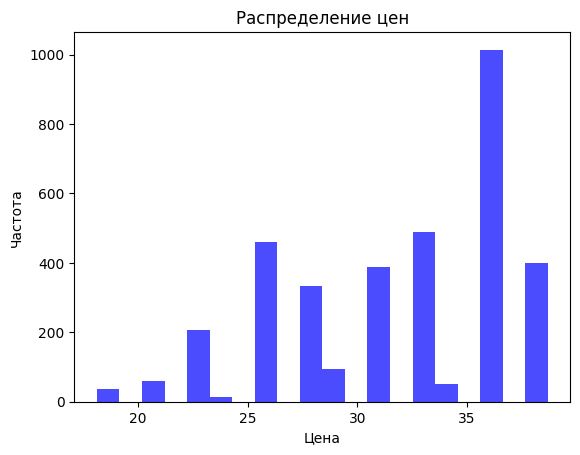

In [ ]:
import matplotlib.pyplot as plt


plt.hist(df['money'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.title("Распределение цен")
plt.show()

Посчитаем корреляцию между переменными

In [ ]:
correlation = df['money'].corr(df['Hour'])
print("Корреляция между ценой и временем продажи", correlation)

Корреляция между ценой и временем продажи 0.2026991278709631


Построим "Ящик с усами" и постмотрим на выбросы

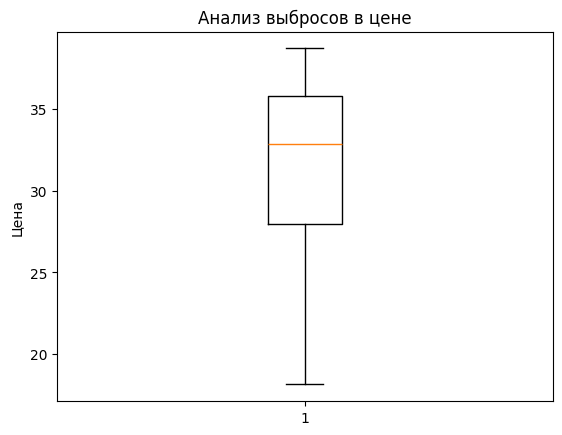

In [ ]:
plt.boxplot(df['money'])
plt.ylabel("Цена")
plt.title("Анализ выбросов в цене")
plt.show()

Выбросов не оказалось. Все цены в пределах нормы.

Посмотрим какой кофе чаще всего покупали. Им оказался американо с молоком.

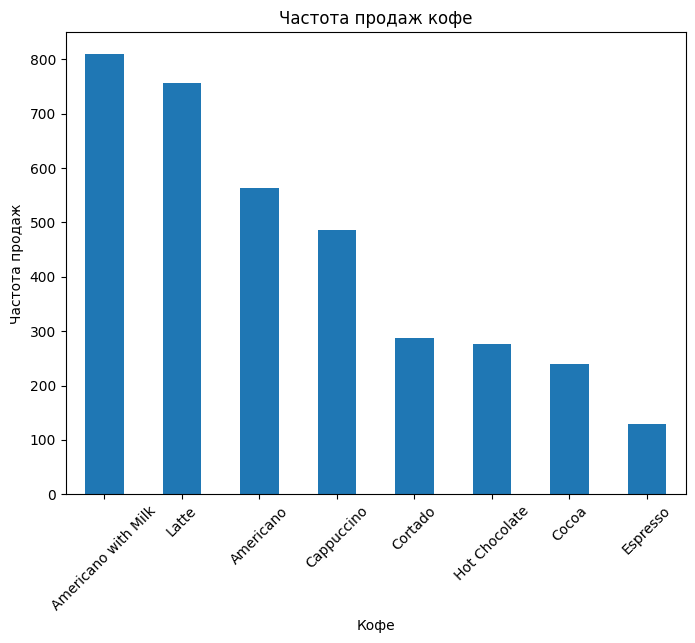

In [ ]:
plt.figure(figsize=(8, 6))
coffee_count = df['coffee_name'].value_counts()
coffee_count.plot(kind='bar')
plt.xlabel("Кофе")
plt.ylabel("Частота продаж")
plt.title("Частота продаж кофе")
plt.xticks(rotation=45)
plt.show()

Объединим два графика


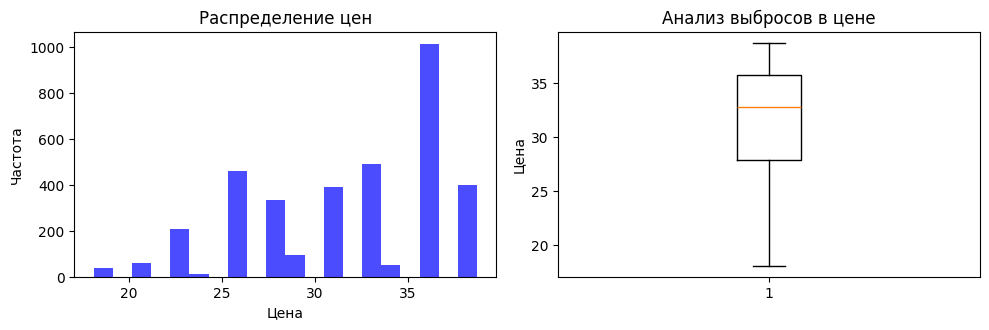

In [ ]:
plt.figure(figsize=(10,6))

plt.subplot(2, 2, 1)
plt.hist(df['money'], bins=20, color='blue', alpha=0.7)
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.title("Распределение цен")

plt.subplot(2, 2, 2)
plt.boxplot(df['money'])
plt.ylabel("Цена")
plt.title("Анализ выбросов в цене")

plt.tight_layout()
plt.show()

/tmp/ipython-input-2417535693.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='viridis')


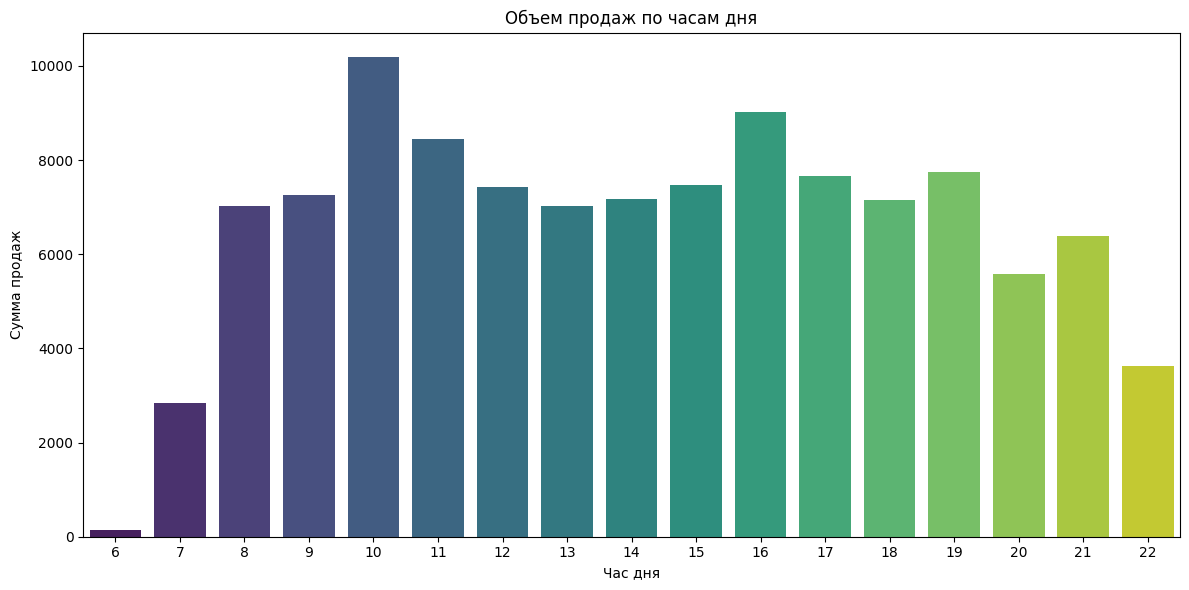

In [ ]:
# Анализ по часам дня

import seaborn as sns


plt.figure(figsize=(12, 6))
sales_by_hour = df.groupby('hour_of_day')['money'].sum()
sns.barplot(x=sales_by_hour.index, y=sales_by_hour.values, palette='viridis')
plt.title("Объем продаж по часам дня")
plt.xlabel("Час дня")
plt.ylabel("Сумма продаж")
plt.tight_layout()
plt.show()

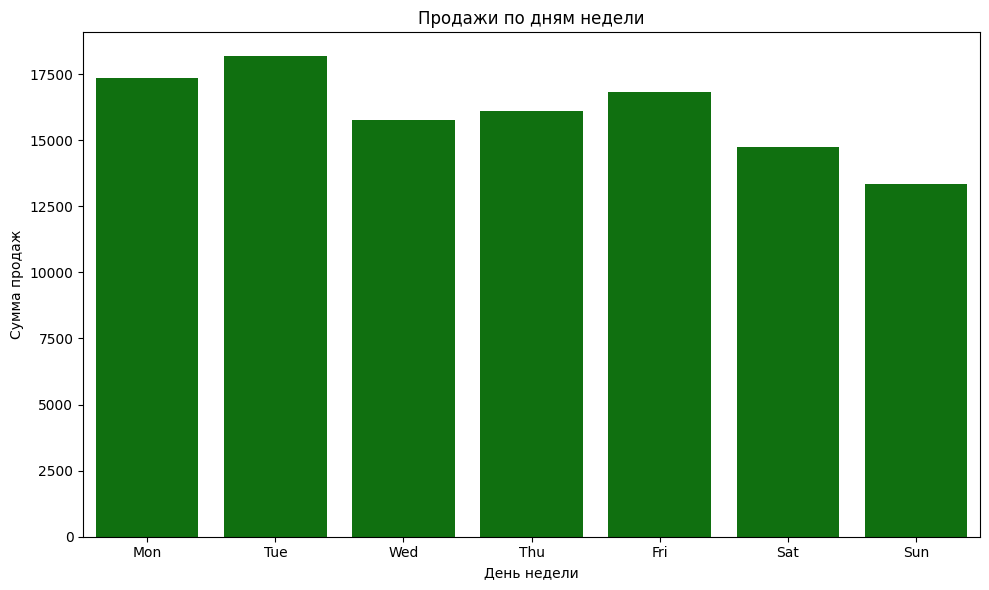

In [ ]:
# Продажи по дням недели

plt.figure(figsize=(10, 6))
weekday_sales = df.groupby('Weekday')['money'].sum().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, color='green')
plt.title("Продажи по дням недели")
plt.xlabel("День недели")
plt.ylabel("Сумма продаж")
plt.tight_layout()
plt.show()

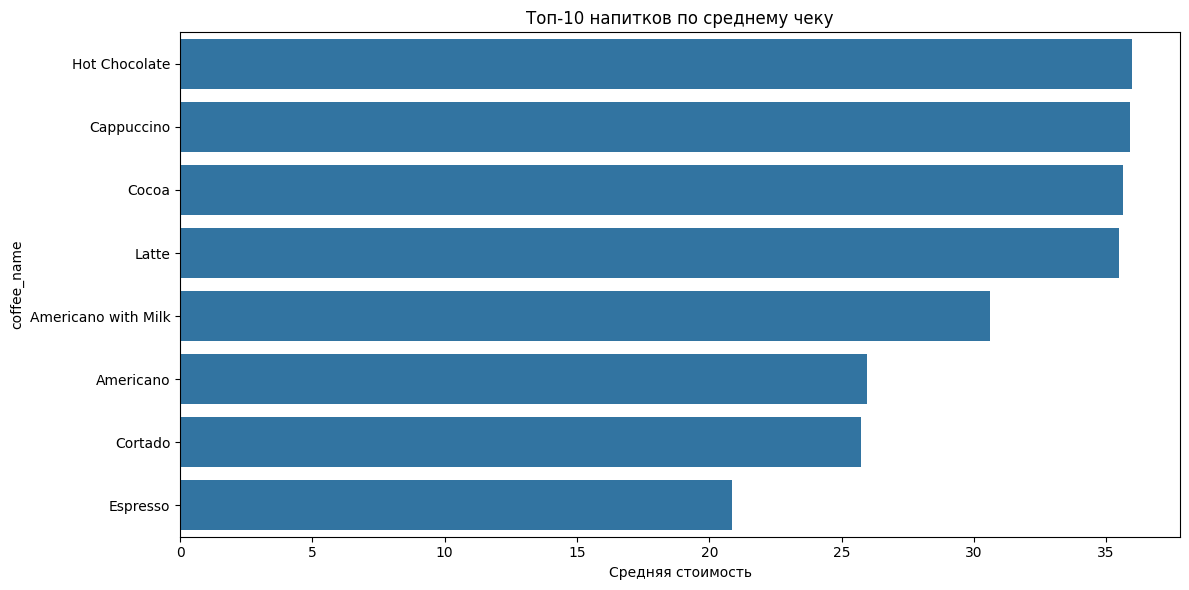

In [ ]:
# Средний чек по типам кофе

plt.figure(figsize=(12, 6))
avg_check = df.groupby('coffee_name')['money'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_check.values, y=avg_check.index)
plt.title("Топ-10 напитков по среднему чеку")
plt.xlabel("Средняя стоимость")
plt.tight_layout()
plt.show()

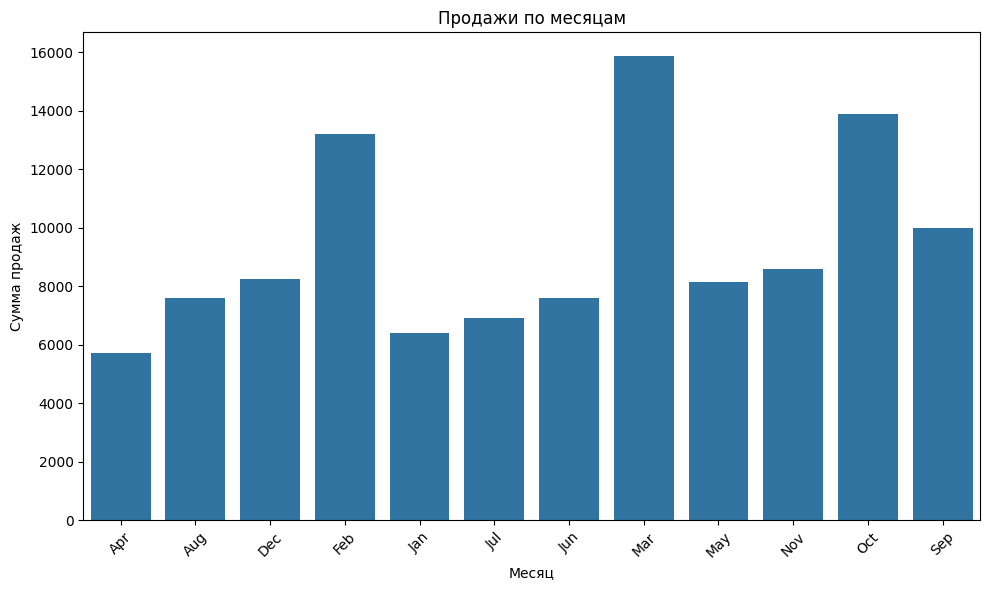

In [ ]:
# Продажи по месяцам

plt.figure(figsize=(10, 6))
monthly_sales = df.groupby('Month_name')['money'].sum()
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title("Продажи по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Сумма продаж")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()